# Tutorial 5: Classification

---

### Introduction

In this notebook, we will try to classify the galaxy classes using two different ways:
   1. Unsupervised learning
   2. Supervised learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

---

### Unsupervised Learning

In this step, we will use `kmeans` for clustering between the different galaxies. `kmeans` is a popular unsupervised learning method. Other unsupervised learning methods can be found [here](https://scikit-learn.org/stable/modules/clustering.html).

Next let us recall the data, in this step we will use the 

In [15]:
%store -r auto_df_train 
%store -r auto_df_test
%store -r labels_train
%store -r labels_test
%store -r classes

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(init="k-means++", n_clusters=4)
kmeans.fit(auto_df_train)
pred_cluster = kmeans.predict(auto_df_test)

Now let us check the clustring results

In [5]:
from source.clustering import plot_confusion_matrix

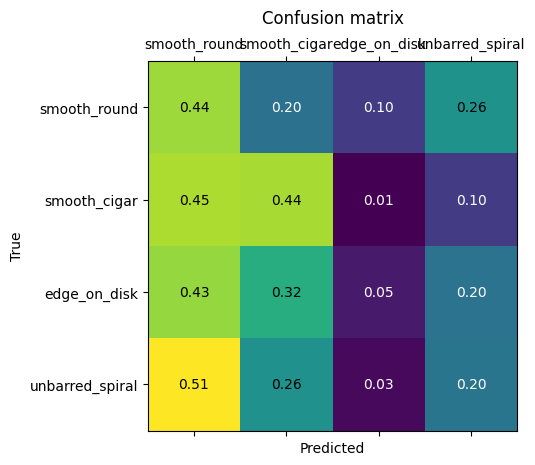

In [6]:
plot_confusion_matrix(pred_cluster, auto_df_test, labels_test, classes)

Since the data we have is labelled, we can use standard classification accuracies to measure the performance of the `kmeans` model. But For clustering, there is no association provided by the clustering algorithm between the class labels and the predicted cluster labels [ref](https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/). We, therefore, need to assign/match the class ground truth to the predicted clusters to get the maximum accuracy. @@ will need help here (check Ezra's paper).

In [7]:
from source.clustering import labelMap, convertLabels

In [8]:
lmap = labelMap(np.array(labels_test), pred_cluster)
print(lmap)
conv_preds_cluster = convertLabels(np.array(lmap), np.array(pred_cluster))

[3 1 2 0]


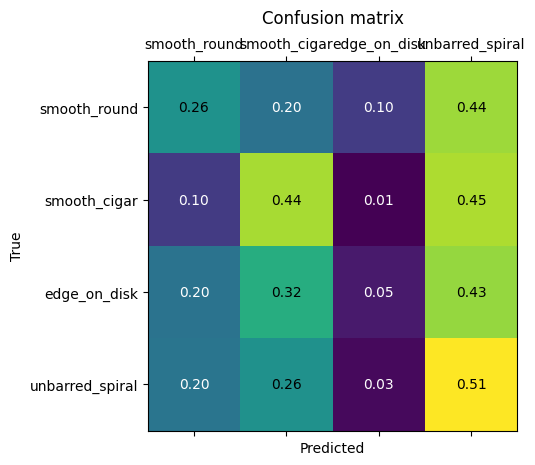

In [9]:
plot_confusion_matrix(conv_preds_cluster, auto_df_test, labels_test, classes)

In [14]:
print(precision_recall_fscore_support(y_pred=conv_preds_cluster, y_true=labels_test, average='weighted'))

(0.3106024088500351, 0.313, 0.282048812676804, None)


---

### Supervised learning

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd = SGDClassifier()

sgd.fit(auto_df_train, labels_train)

SGDClassifier()

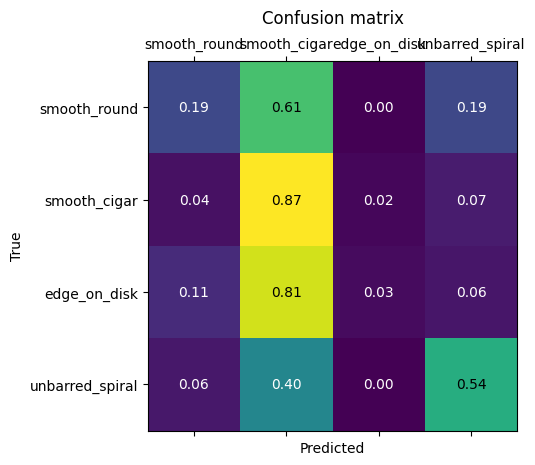

In [21]:
y_predict = sgd.predict(auto_df_test)

plot_confusion_matrix(y_predict, auto_df_test, labels_test, classes)


In [22]:
print(precision_recall_fscore_support(y_pred=y_predict, y_true=labels_test, average='weighted'))

(0.4792746031543161, 0.4045, 0.3408569155247716, None)


we notice that we do get better results than the unspervised learning

---